In [34]:
import matplotlib.pyplot as plt
import numpy as np

file_in = "/work/submit/jbenke/WRemnants/scripts/corrections/liv_amplitudes_lr_FINE.npy"
file_out = "/home/submit/jbenke/public_html/theory_predictions/2025-08-13/"

coeff = 2
coeff_name = ["cxx", "cxy", "cxz", "cyz"]
liv_amp = np.load(file_in)
Q_range = [50, 60.3, 85.2298, 88.1398, 89.3644, 90.16, 90.8102, 91.428, 92.1163, 93.0461, 94.9463, 120, 130]
ext = ""
if "FINE" in file_in:
    Q_range = np.linspace(15, 120, 15)  
    ext = "_FINE"


In [35]:
time_projected = np.zeros([len(Q_range)-1, 2, 2])
for i in range(len(Q_range)-1):
    for j in range(2):
        for k in range(2):
            time_projected[i, j, k] = np.max(liv_amp[i, coeff, j,k]) - 1
            
up_left = time_projected[:, 0, 0]
up_right = time_projected[:, 0, 1]
down_left = time_projected[:, 1, 0]
down_right = time_projected[:, 1, 1]

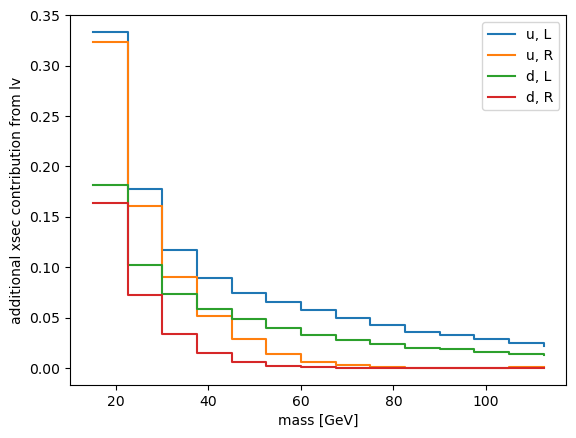

In [36]:
plt.step(Q_range[:-1], up_left, label = "u, L", where = "post")
plt.step(Q_range[:-1], up_right, label = "u, R", where = "post")
plt.step(Q_range[:-1], down_left, label = "d, L", where = "post")
plt.step(Q_range[:-1],down_right, label = "d, R", where = "post")
plt.ylabel("additional xsec contribution from lv")
plt.xlabel("mass [GeV]")
# plt.ylim([0, .01])
plt.legend()
plt.savefig(f"{file_out}{coeff_name[coeff]}_all{ext}.png")
plt.show()


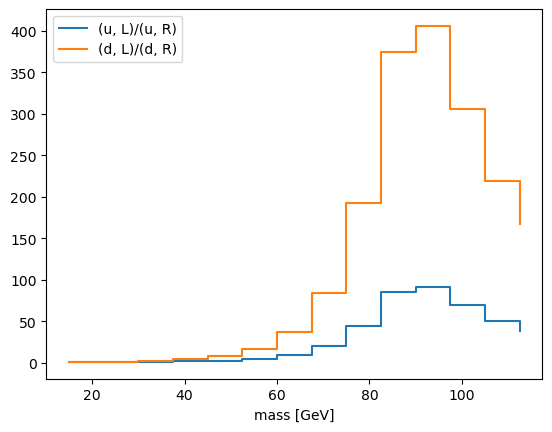

In [39]:
### left/right ratios
plt.step(Q_range[:-1], up_left/up_right, label = "(u, L)/(u, R)", where = "post")
plt.step(Q_range[:-1], down_left/down_right, label = "(d, L)/(d, R)", where = "post")
plt.xlabel("mass [GeV]")
plt.legend()
plt.savefig(f"{file_out}{coeff_name[coeff]}_left_right{ext}.png")

plt.show()

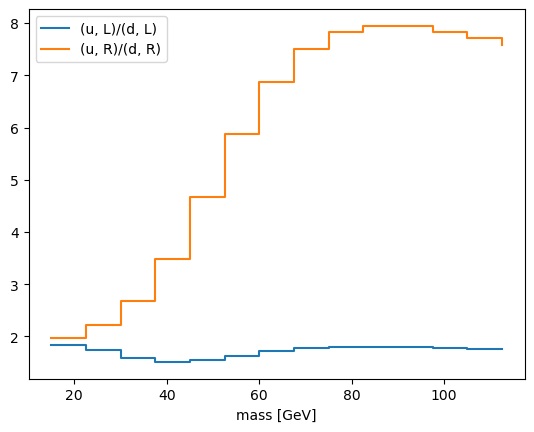

In [40]:
## up/down ratio

plt.step(Q_range[:-1], up_left/down_left, label = "(u, L)/(d, L)", where = "post")
plt.step(Q_range[:-1], up_right/down_right, label = "(u, R)/(d, R)", where = "post")
plt.xlabel("mass [GeV]")
plt.legend()
plt.savefig(f"{file_out}{coeff_name[coeff]}_up_down{ext}.png")
plt.show()